In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
lunitmodel = pd.read_csv('./lstm 학습 데이터.csv', encoding='cp949')

In [3]:
lunitmodel

,종목코드,종목명,날짜,시간,시가,고가,저가,종가,거래량,SMA5,SMA20,UPPER,MAVG,LOWER,RSI,MACD,AROONUP,AROONDN,NEWS,LABEL
0,A328130,루닛,20220907,901,33500.0,33500.0,33450.0,0.0,190.0,34300.0,36065.0,43211.232571,37787.5,32363.767429,32.432582,-1861.666357,100.000000,7.142857,0.0,0.0
1,A328130,루닛,20220907,902,33650.0,33650.0,33550.0,33650.0,210.0,34300.0,36065.0,43211.232571,37787.5,32363.767429,32.432582,-1861.666357,100.000000,7.142857,0.0,2.0
2,A328130,루닛,20220907,903,33650.0,33750.0,33650.0,33650.0,319.0,34300.0,36065.0,43211.232571,37787.5,32363.767429,32.432582,-1861.666357,100.000000,7.142857,0.0,0.0
3,A328130,루닛,20220907,904,33700.0,33700.0,33650.0,33650.0,462.0,34300.0,36065.0,43211.232571,37787.5,32363.767429,32.432582,-1861.666357,100.000000,7.142857,0.0,0.0
4,A328130,루닛,20220907,905,33700.0,33700.0,33700.0,33700.0,589.0,34300.0,36065.0,43211.232571,37787.5,32363.767429,32.432582,-1861.666357,100.000000,7.142857,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77751,A328130,루닛,20230718,1517,176400.0,176600.0,176400.0,176500.0,237135.0,182540.0,181290.0,202514.664345,169110.0,135705.335655,60.367850,18578.260887,14.285714,78.571429,0.0,2.0
77752,A328130,루닛,20230718,1518,176500.0,176600.0,176400.0,176500.0,237532.0,182540.0,181290.0,202514.664345,169110.0,135705.335655,60.367850,18578.260887,14.285714,78.571429,0.0,0.0
77753,A328130,루닛,20230718,1519,176600.0,176600.0,176500.0,176600.0,237947.0,182540.0,181290.0,202514.664345,169110.0,135705.335655,60.367850,18578.260887,14.285714,78.571429,0.0,2.0
77754,A328130,루닛,20230718,1520,176600.0,176800.0,176500.0,176800.0,238596.0,182540.0,181290.0,202514.664345,169110.0,135705.335655,60.367850,18578.260887,14.285714,78.571429,0.0,2.0


In [4]:
# hi = hi.drop(columns = '누적체결매도수량')
# hi = hi.drop(columns = '누적체결매수수량')
lunitmodel = lunitmodel.drop(columns = '종목코드')
lunitmodel = lunitmodel.drop(columns = '종목명')
# hi = hi.drop(columns = '시간')
# hi = hi.drop(columns = '거래대금')

In [5]:
lunitmodel

,날짜,시간,시가,고가,저가,종가,거래량,SMA5,SMA20,UPPER,MAVG,LOWER,RSI,MACD,AROONUP,AROONDN,NEWS,LABEL
0,20220907,901,33500.0,33500.0,33450.0,0.0,190.0,34300.0,36065.0,43211.232571,37787.5,32363.767429,32.432582,-1861.666357,100.000000,7.142857,0.0,0.0
1,20220907,902,33650.0,33650.0,33550.0,33650.0,210.0,34300.0,36065.0,43211.232571,37787.5,32363.767429,32.432582,-1861.666357,100.000000,7.142857,0.0,2.0
2,20220907,903,33650.0,33750.0,33650.0,33650.0,319.0,34300.0,36065.0,43211.232571,37787.5,32363.767429,32.432582,-1861.666357,100.000000,7.142857,0.0,0.0
3,20220907,904,33700.0,33700.0,33650.0,33650.0,462.0,34300.0,36065.0,43211.232571,37787.5,32363.767429,32.432582,-1861.666357,100.000000,7.142857,0.0,0.0
4,20220907,905,33700.0,33700.0,33700.0,33700.0,589.0,34300.0,36065.0,43211.232571,37787.5,32363.767429,32.432582,-1861.666357,100.000000,7.142857,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77751,20230718,1517,176400.0,176600.0,176400.0,176500.0,237135.0,182540.0,181290.0,202514.664345,169110.0,135705.335655,60.367850,18578.260887,14.285714,78.571429,0.0,2.0
77752,20230718,1518,176500.0,176600.0,176400.0,176500.0,237532.0,182540.0,181290.0,202514.664345,169110.0,135705.335655,60.367850,18578.260887,14.285714,78.571429,0.0,0.0
77753,20230718,1519,176600.0,176600.0,176500.0,176600.0,237947.0,182540.0,181290.0,202514.664345,169110.0,135705.335655,60.367850,18578.260887,14.285714,78.571429,0.0,2.0
77754,20230718,1520,176600.0,176800.0,176500.0,176800.0,238596.0,182540.0,181290.0,202514.664345,169110.0,135705.335655,60.367850,18578.260887,14.285714,78.571429,0.0,2.0


In [6]:
lunitmodel['date'] = lunitmodel['날짜'].map(str) + "" + lunitmodel['시간'].map(str)
lunitmodel

,날짜,시간,시가,고가,저가,종가,거래량,SMA5,SMA20,UPPER,MAVG,LOWER,RSI,MACD,AROONUP,AROONDN,NEWS,LABEL,date
0,20220907,901,33500.0,33500.0,33450.0,0.0,190.0,34300.0,36065.0,43211.232571,37787.5,32363.767429,32.432582,-1861.666357,100.000000,7.142857,0.0,0.0,20220907901
1,20220907,902,33650.0,33650.0,33550.0,33650.0,210.0,34300.0,36065.0,43211.232571,37787.5,32363.767429,32.432582,-1861.666357,100.000000,7.142857,0.0,2.0,20220907902
2,20220907,903,33650.0,33750.0,33650.0,33650.0,319.0,34300.0,36065.0,43211.232571,37787.5,32363.767429,32.432582,-1861.666357,100.000000,7.142857,0.0,0.0,20220907903
3,20220907,904,33700.0,33700.0,33650.0,33650.0,462.0,34300.0,36065.0,43211.232571,37787.5,32363.767429,32.432582,-1861.666357,100.000000,7.142857,0.0,0.0,20220907904
4,20220907,905,33700.0,33700.0,33700.0,33700.0,589.0,34300.0,36065.0,43211.232571,37787.5,32363.767429,32.432582,-1861.666357,100.000000,7.142857,0.0,2.0,20220907905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77751,20230718,1517,176400.0,176600.0,176400.0,176500.0,237135.0,182540.0,181290.0,202514.664345,169110.0,135705.335655,60.367850,18578.260887,14.285714,78.571429,0.0,2.0,202307181517
77752,20230718,1518,176500.0,176600.0,176400.0,176500.0,237532.0,182540.0,181290.0,202514.664345,169110.0,135705.335655,60.367850,18578.260887,14.285714,78.571429,0.0,0.0,202307181518
77753,20230718,1519,176600.0,176600.0,176500.0,176600.0,237947.0,182540.0,181290.0,202514.664345,169110.0,135705.335655,60.367850,18578.260887,14.285714,78.571429,0.0,2.0,202307181519
77754,20230718,1520,176600.0,176800.0,176500.0,176800.0,238596.0,182540.0,181290.0,202514.664345,169110.0,135705.335655,60.367850,18578.260887,14.285714,78.571429,0.0,2.0,202307181520


In [7]:
# lunitmodel.rename(columns={'날짜':'date'}, inplace=True)
lunitmodel.rename(columns={'시가':'open'}, inplace=True)
lunitmodel.rename(columns={'고가':'high'}, inplace=True)
lunitmodel.rename(columns={'저가':'low'}, inplace=True)
lunitmodel.rename(columns={'종가':'close'}, inplace=True)
lunitmodel.rename(columns={'거래량':'volume'}, inplace=True)

In [8]:
lunitmodel

,날짜,시간,open,high,low,close,volume,SMA5,SMA20,UPPER,MAVG,LOWER,RSI,MACD,AROONUP,AROONDN,NEWS,LABEL,date
0,20220907,901,33500.0,33500.0,33450.0,0.0,190.0,34300.0,36065.0,43211.232571,37787.5,32363.767429,32.432582,-1861.666357,100.000000,7.142857,0.0,0.0,20220907901
1,20220907,902,33650.0,33650.0,33550.0,33650.0,210.0,34300.0,36065.0,43211.232571,37787.5,32363.767429,32.432582,-1861.666357,100.000000,7.142857,0.0,2.0,20220907902
2,20220907,903,33650.0,33750.0,33650.0,33650.0,319.0,34300.0,36065.0,43211.232571,37787.5,32363.767429,32.432582,-1861.666357,100.000000,7.142857,0.0,0.0,20220907903
3,20220907,904,33700.0,33700.0,33650.0,33650.0,462.0,34300.0,36065.0,43211.232571,37787.5,32363.767429,32.432582,-1861.666357,100.000000,7.142857,0.0,0.0,20220907904
4,20220907,905,33700.0,33700.0,33700.0,33700.0,589.0,34300.0,36065.0,43211.232571,37787.5,32363.767429,32.432582,-1861.666357,100.000000,7.142857,0.0,2.0,20220907905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77751,20230718,1517,176400.0,176600.0,176400.0,176500.0,237135.0,182540.0,181290.0,202514.664345,169110.0,135705.335655,60.367850,18578.260887,14.285714,78.571429,0.0,2.0,202307181517
77752,20230718,1518,176500.0,176600.0,176400.0,176500.0,237532.0,182540.0,181290.0,202514.664345,169110.0,135705.335655,60.367850,18578.260887,14.285714,78.571429,0.0,0.0,202307181518
77753,20230718,1519,176600.0,176600.0,176500.0,176600.0,237947.0,182540.0,181290.0,202514.664345,169110.0,135705.335655,60.367850,18578.260887,14.285714,78.571429,0.0,2.0,202307181519
77754,20230718,1520,176600.0,176800.0,176500.0,176800.0,238596.0,182540.0,181290.0,202514.664345,169110.0,135705.335655,60.367850,18578.260887,14.285714,78.571429,0.0,2.0,202307181520


In [9]:
lunitmodel = lunitmodel.drop(columns = '날짜')
lunitmodel = lunitmodel.drop(columns = '시간')
# lunitmodel = lunitmodel.drop(columns = 'sentiment_score')

In [10]:
lunitmodel

,open,high,low,close,volume,SMA5,SMA20,UPPER,MAVG,LOWER,RSI,MACD,AROONUP,AROONDN,NEWS,LABEL,date
0,33500.0,33500.0,33450.0,0.0,190.0,34300.0,36065.0,43211.232571,37787.5,32363.767429,32.432582,-1861.666357,100.000000,7.142857,0.0,0.0,20220907901
1,33650.0,33650.0,33550.0,33650.0,210.0,34300.0,36065.0,43211.232571,37787.5,32363.767429,32.432582,-1861.666357,100.000000,7.142857,0.0,2.0,20220907902
2,33650.0,33750.0,33650.0,33650.0,319.0,34300.0,36065.0,43211.232571,37787.5,32363.767429,32.432582,-1861.666357,100.000000,7.142857,0.0,0.0,20220907903
3,33700.0,33700.0,33650.0,33650.0,462.0,34300.0,36065.0,43211.232571,37787.5,32363.767429,32.432582,-1861.666357,100.000000,7.142857,0.0,0.0,20220907904
4,33700.0,33700.0,33700.0,33700.0,589.0,34300.0,36065.0,43211.232571,37787.5,32363.767429,32.432582,-1861.666357,100.000000,7.142857,0.0,2.0,20220907905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77751,176400.0,176600.0,176400.0,176500.0,237135.0,182540.0,181290.0,202514.664345,169110.0,135705.335655,60.367850,18578.260887,14.285714,78.571429,0.0,2.0,202307181517
77752,176500.0,176600.0,176400.0,176500.0,237532.0,182540.0,181290.0,202514.664345,169110.0,135705.335655,60.367850,18578.260887,14.285714,78.571429,0.0,0.0,202307181518
77753,176600.0,176600.0,176500.0,176600.0,237947.0,182540.0,181290.0,202514.664345,169110.0,135705.335655,60.367850,18578.260887,14.285714,78.571429,0.0,2.0,202307181519
77754,176600.0,176800.0,176500.0,176800.0,238596.0,182540.0,181290.0,202514.664345,169110.0,135705.335655,60.367850,18578.260887,14.285714,78.571429,0.0,2.0,202307181520


In [11]:
lunitmodel.set_index('date',inplace=True)

In [12]:
lunitmodel = lunitmodel.sort_index(ascending=True)
lunitmodel

,open,high,low,close,volume,SMA5,SMA20,UPPER,MAVG,LOWER,RSI,MACD,AROONUP,AROONDN,NEWS,LABEL
date,,,,,,,,,,,,,,,,
202209071000,32550.0,32600.0,32550.0,32600.0,14204.0,34300.0,36065.0,43211.232571,37787.5,32363.767429,32.432582,-1861.666357,100.000000,7.142857,0.0,2.0
202209071001,32600.0,32650.0,32600.0,32600.0,14205.0,34300.0,36065.0,43211.232571,37787.5,32363.767429,32.432582,-1861.666357,100.000000,7.142857,0.0,0.0
202209071002,32650.0,32700.0,32650.0,32700.0,14205.0,34300.0,36065.0,43211.232571,37787.5,32363.767429,32.432582,-1861.666357,100.000000,7.142857,0.0,2.0
202209071003,32700.0,32700.0,32600.0,32700.0,14217.0,34300.0,36065.0,43211.232571,37787.5,32363.767429,32.432582,-1861.666357,100.000000,7.142857,0.0,0.0
202209071004,32600.0,32800.0,32600.0,32750.0,14253.0,34300.0,36065.0,43211.232571,37787.5,32363.767429,32.432582,-1861.666357,100.000000,7.142857,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20230718955,176100.0,176500.0,176000.0,176100.0,76784.0,182540.0,181290.0,202514.664345,169110.0,135705.335655,60.367850,18578.260887,14.285714,78.571429,0.0,0.0
20230718956,176100.0,176700.0,176100.0,176700.0,76825.0,182540.0,181290.0,202514.664345,169110.0,135705.335655,60.367850,18578.260887,14.285714,78.571429,0.0,2.0
20230718957,176700.0,178700.0,176300.0,178100.0,77527.0,182540.0,181290.0,202514.664345,169110.0,135705.335655,60.367850,18578.260887,14.285714,78.571429,0.0,2.0


In [13]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()

# # 데이터를 표준화(변환)
# scaled_data = scaler.fit_transform(lunitmodel)

# print(scaled_data)

In [14]:
# def StandardScaler(data):
#     scaler = StandardScaler()

#     df_scaler = scaler.fit_transform(data)
#     df_scaler = pd.DataFrame(df_scaler)
#     df_scaler.columns = data.columns
#     df_scaler.index = data.index

#     return df_scaler

# hi = StandardScaler(lunitmodel)

In [15]:
def MinMaxScaler(data):
    """최솟값과 최댓값을 이용하여 0 ~ 1 값으로 변환"""
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # 0으로 나누기 에러가 발생하지 않도록 매우 작은 값(1e-7)을 더해서 나눔
    return numerator / (denominator + 1e-7)

hi = MinMaxScaler(lunitmodel)

In [18]:
dfx = lunitmodel[['open','high','low','volume','close','SMA5','SMA20','UPPER','MAVG','LOWER','RSI','MACD','AROONUP','AROONDN','NEWS','LABEL']]
dfx = MinMaxScaler(dfx)
dfy = dfx[['close']]
dfx = dfx[['open','high','low','volume','SMA5','SMA20','UPPER','MAVG','LOWER','RSI','MACD','AROONUP','AROONDN','NEWS','LABEL']]
dfx

,open,high,low,volume,SMA5,SMA20,UPPER,MAVG,LOWER,RSI,MACD,AROONUP,AROONDN,NEWS,LABEL
date,,,,,,,,,,,,,,,
202209071000,0.074910,0.074774,0.075498,0.007748,0.086997,0.09714,0.097229,0.108938,0.124954,0.149321,0.066854,1.000000,0.071429,0.0,1.0
202209071001,0.075186,0.075048,0.075774,0.007749,0.086997,0.09714,0.097229,0.108938,0.124954,0.149321,0.066854,1.000000,0.071429,0.0,0.0
202209071002,0.075461,0.075322,0.076051,0.007749,0.086997,0.09714,0.097229,0.108938,0.124954,0.149321,0.066854,1.000000,0.071429,0.0,1.0
202209071003,0.075737,0.075322,0.075774,0.007755,0.086997,0.09714,0.097229,0.108938,0.124954,0.149321,0.066854,1.000000,0.071429,0.0,0.0
202209071004,0.075186,0.075870,0.075774,0.007775,0.086997,0.09714,0.097229,0.108938,0.124954,0.149321,0.066854,1.000000,0.071429,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20230718955,0.865602,0.863051,0.868916,0.041885,0.998401,1.00000,0.947804,1.000000,1.000000,0.573159,0.811816,0.142857,0.785714,0.0,0.0
20230718956,0.865602,0.864147,0.869469,0.041908,0.998401,1.00000,0.947804,1.000000,1.000000,0.573159,0.811816,0.142857,0.785714,0.0,1.0
20230718957,0.868907,0.875103,0.870575,0.042291,0.998401,1.00000,0.947804,1.000000,1.000000,0.573159,0.811816,0.142857,0.785714,0.0,1.0


In [19]:
dfy

,close
date,
202209071000,0.162594
202209071001,0.162594
202209071002,0.163092
202209071003,0.163092
202209071004,0.163342
...,...
20230718955,0.878304
20230718956,0.881297
20230718957,0.888279


In [20]:
# 두 데이터를 리스트 형태로 저장
X = dfx.values.tolist()
y = dfy.values.tolist()

In [21]:
window_size = 10

data_X = []
data_y = []
for i in range(len(y) - window_size):
    _X = X[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    data_X.append(_X)
    data_y.append(_y)
print(_X, "->", _y)

[[0.8694574497378852, 0.8652423993421718, 0.8700221238933241, 0.038239919615487644, 0.9984014755604067, 0.9999999999993783, 0.9478037011302937, 0.9999999999993214, 0.9999999999991532, 0.5731593952439613, 0.8118155317910504, 0.14285714271428573, 0.7857142849285714, 0.0, 0.4999999750000013], [0.8689066372895241, 0.8641468090929257, 0.8705752212384565, 0.03836483854092304, 0.9984014755604067, 0.9999999999993783, 0.9478037011302937, 0.9999999999993214, 0.9999999999991532, 0.5731593952439613, 0.8118155317910504, 0.14285714271428573, 0.7857142849285714, 0.0, 0.4999999750000013], [0.8672541999444411, 0.8630512188436795, 0.8689159292030593, 0.0393783728791718, 0.9984014755604067, 0.9999999999993783, 0.9478037011302937, 0.9999999999993214, 0.9999999999991532, 0.5731593952439613, 0.8118155317910504, 0.14285714271428573, 0.7857142849285714, 0.0, 0.9999999500000026], [0.8672541999444411, 0.8635990139683026, 0.8705752212384565, 0.03957311548345318, 0.9984014755604067, 0.9999999999993783, 0.94780370

In [22]:
print('전체 데이터의 크기 :', len(data_X), len(data_y))

전체 데이터의 크기 : 77746 77746


In [23]:
train_size = int(len(data_y) * 0.7)
train_X = np.array(data_X[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_X = np.array(data_X[train_size : len(data_X)])
test_y = np.array(data_y[train_size : len(data_y)])

print('훈련 데이터의 크기 :', train_X.shape, train_y.shape)
print('테스트 데이터의 크기 :', test_X.shape, test_y.shape)

훈련 데이터의 크기 : (54422, 10, 15) (54422, 1)
테스트 데이터의 크기 : (23324, 10, 15) (23324, 1)


In [24]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout # dl_dev_gpu

In [25]:
model = Sequential()
model.add(LSTM(units=20, activation='sigmoid', return_sequences=True, input_shape=(10, 15))) # input_shape 를 dfx에 맞춰야 한다.
model.add(Dropout(0.1))
model.add(LSTM(units=20, activation='sigmoid'))
model.add(Dropout(0.1))
model.add(Dense(units=1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 20)            2880      
                                                                 
 dropout (Dropout)           (None, 10, 20)            0         
                                                                 
 lstm_1 (LSTM)               (None, 20)                3280      
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 6,181
Trainable params: 6,181
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_X, train_y, epochs=10, batch_size=32)
pred_y = model.predict(test_X)

Epoch 1/10
1701/1701 [==============================] - 152s 88ms/step - loss: 0.0057
Epoch 2/10
1701/1701 [==============================] - 142s 83ms/step - loss: 4.4443e-04
Epoch 3/10
1701/1701 [==============================] - 141s 83ms/step - loss: 2.3748e-04
Epoch 4/10
1701/1701 [==============================] - 141s 83ms/step - loss: 1.4831e-04
Epoch 5/10
1701/1701 [==============================] - 141s 83ms/step - loss: 1.0910e-04
Epoch 6/10
1701/1701 [==============================] - 139s 81ms/step - loss: 8.7485e-05
Epoch 7/10
1701/1701 [==============================] - 155s 91ms/step - loss: 6.8764e-05
Epoch 8/10
1701/1701 [==============================] - 157s 92ms/step - loss: 5.8230e-05
Epoch 9/10
1701/1701 [==============================] - 159s 93ms/step - loss: 5.3109e-05
Epoch 10/10
729/729 [==============================] - 7s 9ms/step


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 10, 20)            2880      
                                                                 
 dropout_4 (Dropout)         (None, 10, 20)            0         
                                                                 
 lstm_5 (LSTM)               (None, 20)                3280      
                                                                 
 dropout_5 (Dropout)         (None, 20)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 6,181
Trainable params: 6,181
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1701/1701 [==============================

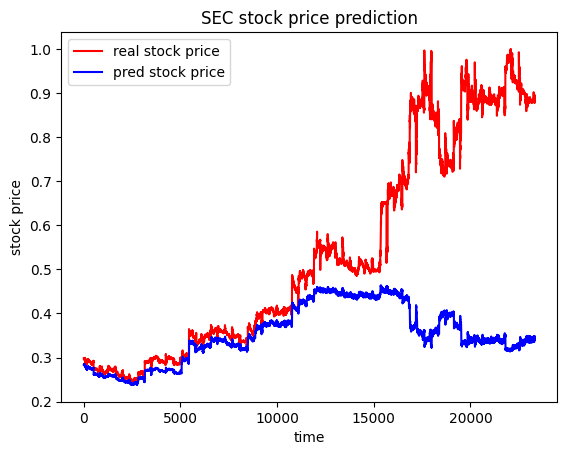

    내일 주가 : [0.34752887] 원


In [29]:
model = Sequential()
model.add(LSTM(units=20, activation='relu', return_sequences=True, input_shape=(10, 15))) # input_shape 를 dfx에 맞춰야 한다.
model.add(Dropout(0.1))
model.add(LSTM(units=20, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1))
model.summary()
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_X, train_y, epochs=10, batch_size=32)
pred_y = model.predict(test_X)
pred_y = model.predict(test_X)

plt.figure()
plt.plot(test_y, color='red', label='real stock price')
plt.plot(pred_y, color='blue', label='pred stock price')
plt.title('SEC stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

print("    내일 주가 :", dfy.close[-1] * pred_y[-1] / dfy.close[-1],'원')

729/729 [==============================] - 10s 13ms/step


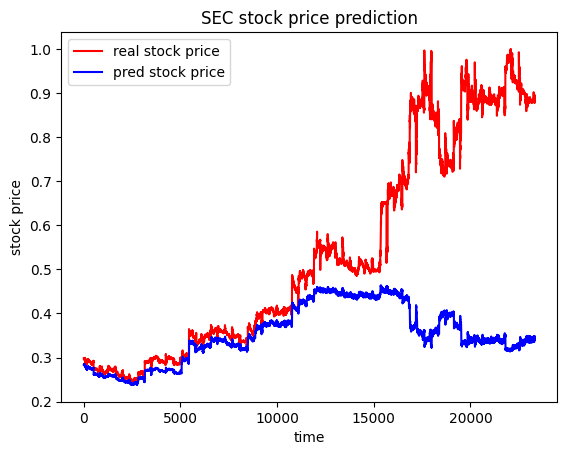

    내일 주가 : [0.34752887]


In [30]:
pred_y = model.predict(test_X)

plt.figure()
plt.plot(test_y, color='red', label='real stock price')
plt.plot(pred_y, color='blue', label='pred stock price')
plt.title('LUNIT stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

print("    내일 주가 :", dfy.close[-1] * pred_y[-1] / dfy.close[-1])

In [31]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test_y, pred_y)
print("Mean Squared Error:", mse)
    
mae = mean_absolute_error(test_y, pred_y)
print("Mean Absolute Error:", mae)

rmse = np.sqrt(mse)
print("Root Mean Square Error:", rmse)


Mean Squared Error: 0.08225617787685191
Mean Absolute Error: 0.1818769570486423
Root Mean Square Error: 0.28680337842649606


In [ ]:
from sklearn.metrics import r2_score
r2_y_pred = r2_score(test_y, pred_y)
print(r2_y_pred)

-1.4439478649588189


In [ ]:
model.save('./lstmmodel.h5')